In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import warnings
warnings.filterwarnings("ignore")



In [2]:
df = pd.read_csv('gld_price_data.csv')
df.dropna(inplace=True)

In [3]:
# 3. Data Understanding
print(df.info())
print("\nDescriptive Statistics:\n", df.describe())
print("\nNull values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB
None

Descriptive Statistics:
                SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297
75%    2

In [4]:
# 4. Data Cleaning
# Drop null values (if any)
df.dropna(inplace=True)

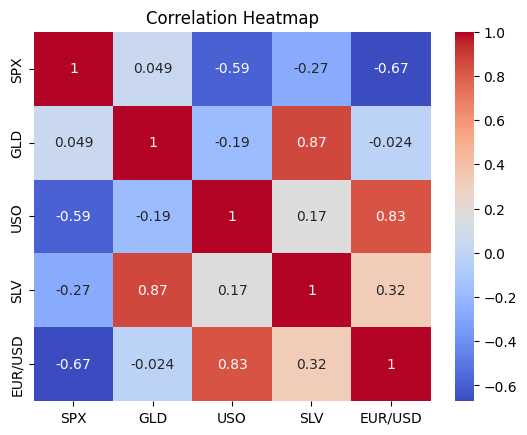

In [6]:
# Only include numeric columns for correlation
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [8]:
print(df.drop('Date', axis=1).corr()['GLD'].sort_values(ascending=False))


GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64


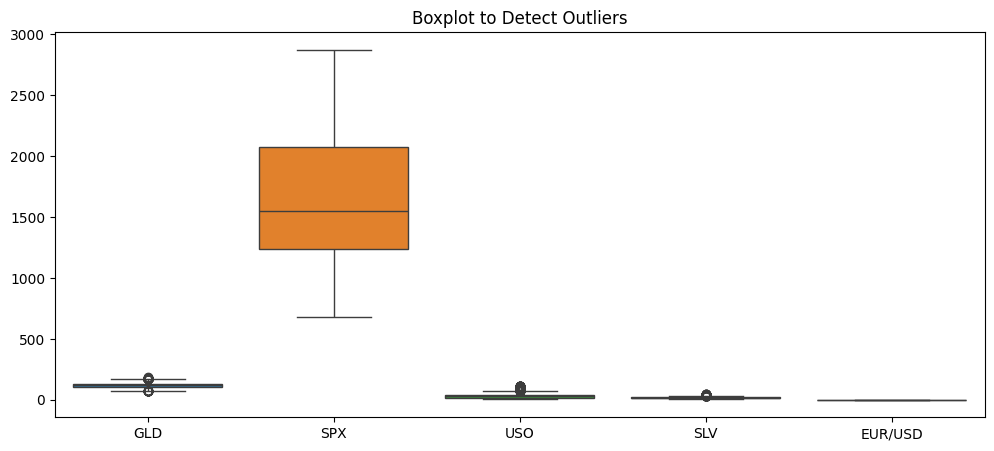

In [9]:
# 6. Outlier Detection
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['GLD', 'SPX', 'USO', 'SLV', 'EUR/USD']])
plt.title("Boxplot to Detect Outliers")
plt.show()

In [10]:
# 7. Removing Outliers (using IQR)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

for col in ['GLD', 'SPX', 'USO', 'SLV', 'EUR/USD']:
    df = remove_outliers(df, col)

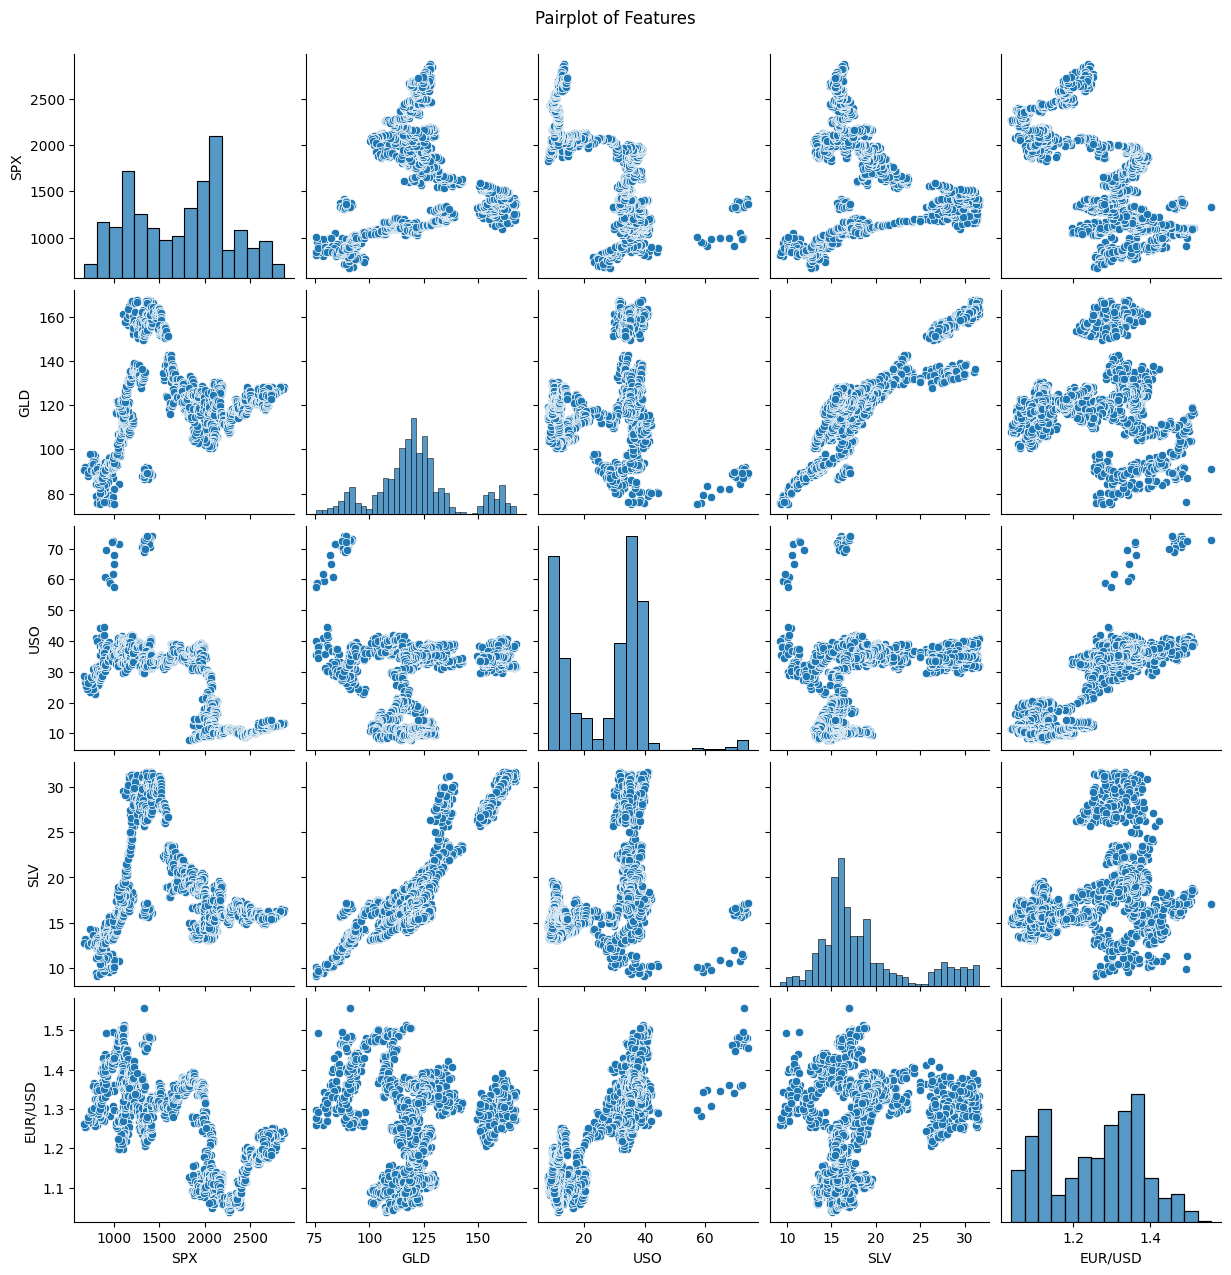

In [11]:
# 8. EDA
sns.pairplot(df)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

In [12]:
# 9. Feature and Label Split
X = df.drop(['Date', 'GLD'], axis=1)
y = df['GLD']

In [13]:
# 10. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:

# 11. Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
# 12. Evaluation
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 1.1330932878533977
MSE: 3.6784087080882095
RMSE: 1.9179178053525154
R2 Score: 0.9899405930494826


In [19]:
# 13. Save Model as .pkl
with open('gold_price_model.pkl', 'wb') as f:
    pickle.dump(model, f)
